In [2]:
# Import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Define image size for VGG16
IMG_SIZE = (224, 224)

Training Image Preprocessing

In [7]:
# Load dataset using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Validation Image Preprocessing

In [5]:
valid_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation

In [6]:
# Load dataset from directory
train_dir = "train"
valid_dir = "valid"

In [8]:
training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode="categorical"
)

Found 5932 images belonging to 4 classes.


In [9]:
validation_set = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode="categorical"
)

Found 4000 images belonging to 4 classes.


In [10]:
# Get number of classes
num_classes = len(training_set.class_indices)

In [11]:

# Load pre-trained VGG16 model (excluding top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [12]:
# Freeze the convolutional base
base_model.trainable = False

In [13]:
# Build the final model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer with number of classes
])

In [14]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 27,692,612
Trainable params: 12,977,924
No

In [15]:
# Train the model
history = model.fit(training_set, validation_data=validation_set, epochs=10)


Epoch 1/10
186/186 [==============================] - 90s 408ms/step - loss: 0.7230 - accuracy: 0.7109 - val_loss: 0.3167 - val_accuracy: 0.8783
Epoch 2/10
186/186 [==============================] - 74s 399ms/step - loss: 0.4338 - accuracy: 0.8323 - val_loss: 0.2208 - val_accuracy: 0.9110
Epoch 3/10
186/186 [==============================] - 72s 387ms/step - loss: 0.3457 - accuracy: 0.8651 - val_loss: 0.1663 - val_accuracy: 0.9433
Epoch 4/10
186/186 [==============================] - 73s 391ms/step - loss: 0.2989 - accuracy: 0.8820 - val_loss: 0.1321 - val_accuracy: 0.9572
Epoch 5/10
186/186 [==============================] - 74s 397ms/step - loss: 0.2621 - accuracy: 0.9036 - val_loss: 0.1086 - val_accuracy: 0.9682
Epoch 6/10
186/186 [==============================] - 72s 388ms/step - loss: 0.2472 - accuracy: 0.9012 - val_loss: 0.1026 - val_accuracy: 0.9672
Epoch 7/10
186/186 [==============================] - 72s 387ms/step - loss: 0.2225 - accuracy: 0.9167 - val_loss: 0.0774 - val_ac

In [1]:
!nvidia-smi

Fri Feb 28 10:29:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.47                 Driver Version: 572.47         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   51C    P4             14W /   56W |       0MiB /   6141MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [16]:
# Save the trained model
model.save('trained_model_vgg16.keras')

Text(0.5, 1.0, 'Model Accuracy')

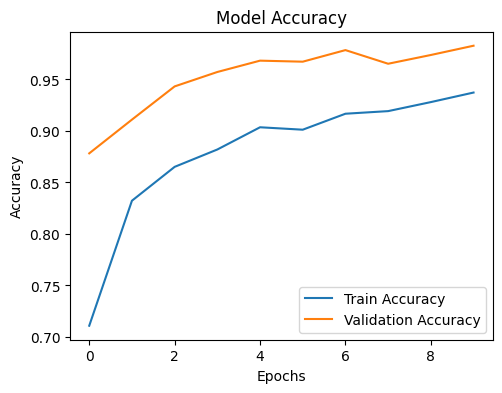

In [17]:
# Plot training accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')


Text(0.5, 1.0, 'Model Loss')

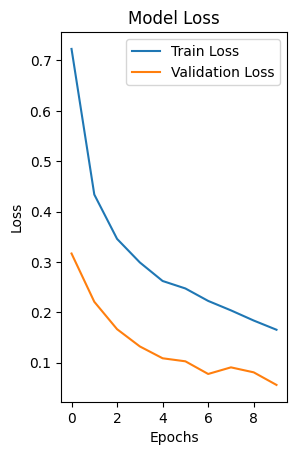

In [18]:

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

In [19]:
plt.show()